# Microsoft Movie Studio Business Project

![micrisoft](./images/Logo_with_name.jpg)

## Overview

Microsfot is creating a movie studio and wants business recommendations for it. Information was gathered by cleaning and analyzing databases from Imdb, Rotten Tomatoes, Tmdb Bom and The Numbers. With that analysis it was possible to gather which type of movies were more profitable. The recommendations for Microsoft Movie Studio that we suggest are:

* Makes movies based on existing popular franchises
* Keep the runtime between 105 and 135 minutes
* Focus on Action/Adventure, Drama, and Family genres
***

## Business Problem


Creating a strategy to develop a new studio demands data. To start a studio Microsoft needs to first come up with a plan of action, regarding which kind of movies to make. With that in mind we looked into what are the movies that are currently more profitable. The results of these findings will provide information on which steps Microsoft should take to be the most successful in their new endeavor.
***

## Data Understanding

This project analysed data from Imdb, Rotten Tomatoes, Tmdb, Bom and The Numbers. They provide crucial information regarding profitable movies and correlate them to genre, runtime and budget. We sampled most of the information in regarding the last ten years of movies. 
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
awdf_tratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
awdf_tratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [3]:
awdf_tratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
awdf_tbasics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')

awdf_tbasics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
awdf_tbasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
leftjoin_rating_basics = awdf_tratings.set_index('tconst').join(awdf_tbasics.set_index('tconst'), how='left', lsuffix='1', rsuffix='2')

leftjoin_rating_basics

# left joining on the ratings and basics tables since we care about the ratings of movies more than just movies that may or may not have a
# rating in these data sets. Every rating has a movie associated with it, but not vice versa

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"


In [7]:
leftjoin_rating_basics.duplicated().sum() #No duplicates listed

0

In [8]:
sorted_numvotes = leftjoin_rating_basics.sort_values(by='numvotes', ascending=False)

sorted_numvotes.head(14000) #top 20 movies by number of votes

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
tt3253232,5.0,492,The Bounce Back,The Bounce Back,2016,104.0,"Comedy,Romance"
tt2185846,3.0,492,Morangos com Açúcar - O Filme,Morangos com Açúcar - O Filme,2012,97.0,"Comedy,Drama,Family"
tt1707384,6.2,492,High School Debut,Kôkô debyû,2011,93.0,"Comedy,Romance"


In [9]:
top_numgenres = sorted_numvotes.head(100).copy()

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,"Drama,Mystery,Sci-Fi"
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,"Crime,Drama"


In [10]:
top_numgenres.info()
# A few runtime_minutes and genres are missing, but only genres 
# matter and we'll just drop the 5 missing genre rows instead

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, tt1375666 to tt1291584
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    100 non-null    float64
 1   numvotes         100 non-null    int64  
 2   primary_title    100 non-null    object 
 3   original_title   100 non-null    object 
 4   start_year       100 non-null    int64  
 5   runtime_minutes  100 non-null    float64
 6   genres           100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 6.2+ KB


In [11]:
top_numgenres.duplicated().sum() #no duplicates

0

In [12]:
top_numgenres = pd.concat([top_numgenres, top_numgenres['genres'].str.split(',', expand=True)], axis=1)
#split 'genres' into separate columns for each comma-separated genre listed
top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,0,1,2
tconst,,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,"Drama,Mystery,Sci-Fi",Drama,Mystery,Sci-Fi
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama,Drama,None,None
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,"Crime,Drama",Crime,Drama,None


In [13]:
#drop 'genres' column

top_numgenres.drop('genres',axis=1, inplace=True)

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,0,1,2
tconst,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,Drama,Mystery,Sci-Fi
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama,None,None
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,Crime,Drama,None


In [14]:
top_numgenres.rename(columns = {0:'genre 1', 1:'genre 2', 2:'genre 3'}, inplace=True)

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genre 1,genre 2,genre 3
tconst,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,Drama,Mystery,Sci-Fi
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama,None,None
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,Crime,Drama,None


In [15]:
genre_list = ['genre 1', 'genre 2', 'genre 3']
top_numgenres_count = {}

for var in genre_list:
    for genre in top_numgenres[var]:
        if genre != None:
            top_numgenres_count[genre] = top_numgenres_count.get(genre, 0) + 1

In [16]:
top_numgenres_count

{'Action': 54,
 'Adventure': 57,
 'Drama': 36,
 'Biography': 8,
 'Mystery': 11,
 'Comedy': 20,
 'Crime': 11,
 'Animation': 5,
 'Thriller': 13,
 'Western': 1,
 'Family': 2,
 'Sci-Fi': 36,
 'Music': 2,
 'Fantasy': 16,
 'Romance': 4,
 'Sport': 1,
 'History': 3,
 'Horror': 1}

In [17]:
df_top_genres = pd.DataFrame({'top genres': [var for var in top_numgenres_count.keys()],
                              'values': [var for var in top_numgenres_count.values()]})

df_top_genres = df_top_genres.sort_values(by='values', ascending=False)

df_top_genres

,top genres,values
1,Adventure,57
0,Action,54
2,Drama,36
11,Sci-Fi,36
5,Comedy,20
13,Fantasy,16
8,Thriller,13
4,Mystery,11
6,Crime,11
3,Biography,8


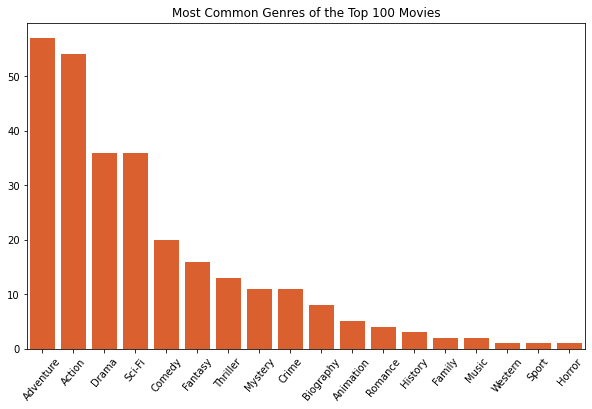

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='top genres', y='values', data= df_top_genres, linewidth=.5, color='#F65314')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50);
ax.set(xlabel=None)
ax.set_ylabel(ylabel=None)
ax.set_title('Most Common Genres of the Top 100 Movies')
sns.set_style(None)
sns.set_context('poster', font_scale=.8)
# plt.savefig('Genres_Most_Common2', bbox_inches='tight');

### Hatice secction

In [19]:
df_budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
# Looking at our statistical summary, only id column shows up because all the other columns are string type. 
df_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [21]:
#Changing Data Types clean solution
# df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])
# df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
# df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
# df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)


In [22]:
def to_int(x):
    x = int(x)
    return x

In [23]:
#Changing Data Types
# clean columns of commas and dollar signs. Turns them into Int
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$', '', regex=False)
df_budget['production_budget'] = df_budget['production_budget'].apply(to_int)
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '', regex=False)
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(to_int)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '', regex=False)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(to_int)

# create 'profit' column and get rid of uninmportant information for this visualisation
df_budget['profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']

In [24]:
# Looking at our cleaned table
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [25]:
# Now with our cleaned data, we can see the statistical summary of all the columns.
df_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


In [26]:
# We see that the unique movie names is less than the total number of rows we have 
df_budget['movie'].nunique()

5698

In [27]:
# We check to see if there are any duplicates of movies
df_budget['movie'].value_counts().head(10)

Home         3
Halloween    3
King Kong    3
Trance       2
Life         2
Notorious    2
Hamlet       2
RoboCop      2
Carrie       2
Legend       2
Name: movie, dtype: int64

In [28]:
# It turns out it is just the remake of certain movies, so no duplicates.
df_budget[(df_budget['movie'] == 'King Kong')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
39,40,"Dec 14, 2005",King Kong,207000000,218080025,550517357,343517357
2374,75,"Dec 17, 1976",King Kong,23000000,52614445,90614445,67614445
5396,97,"Apr 7, 1933",King Kong,672000,10000000,10000650,9328650


In [29]:
df_budget[(df_budget['movie'] == 'Halloween')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
3014,15,"Aug 31, 2007",Halloween,15000000,58269151,77514401,62514401
3535,36,"Oct 19, 2018",Halloween,10000000,159342015,254900667,244900667
5536,37,"Oct 17, 1978",Halloween,325000,47000000,70000000,69675000


In [30]:
df_budget.nlargest(10, ['worldwide_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157


In [31]:
df_budget.nlargest(10, ['domestic_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1042520711
74,75,"Jul 18, 2008",The Dark Knight,185000000,533720947,1001996207,816996207


In [32]:
df_budget.nlargest(10, ['production_budget'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923


In [33]:
# The newest movie in our dataset is from the end of 2020 and the oldest movie is from 1915.
print('Newest movie:', df_budget['release_date'].max())
print('Oldest movie:', df_budget['release_date'].min())

Newest movie: Sep 9, 2016
Oldest movie: Apr 1, 1975


In [34]:
# A new column is created by changing the release_date to years
df_budget['year'] = pd.DatetimeIndex(df_budget['release_date']).year

In [35]:
# Since the analysis is on the films that are currently doing the best at the box office, 
# I wanted to extract the top grossing movies worldwide for the last 5 years.
last_10years = df_budget[(df_budget['year'] >= 2010)]
last_10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000,2014
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000,2015
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,2012
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,2018


In [36]:
top_worldwide_gross_in10years = last_10years.sort_values('worldwide_gross', ascending = False).iloc[:10]
top_worldwide_gross_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018


In [37]:
height_top10_gross = sorted(last_10years.sort_values(by='worldwide_gross', ascending=False)[:10]['worldwide_gross'].tolist())
top10_gross = last_10years.sort_values(by='worldwide_gross', ascending=False)[:10]['movie'].values.tolist()
top10_gross.reverse()

In [38]:
# Correlation coefficient of Production Budget & Worldwide Gross
df_budget['production_budget'].corr(df_budget['worldwide_gross'], method='pearson')

0.7483059765694747

In [39]:
top_production_budget_in10years = last_10years.sort_values('production_budget', ascending = False).iloc[:10]
top_production_budget_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,2017
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,2015
12,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-14997885,2013
13,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100,7778100,2012


In [40]:
height_top10_budget = sorted(last_10years.sort_values(by='production_budget', ascending=False)[:10]['production_budget'].tolist())
top10_budget = last_10years.sort_values(by='production_budget', ascending=False)['movie'][:10].tolist()
top10_budget.reverse()   

In [41]:
for i in range(len(height_top10_budget)):
    height_top10_budget[i] /= 1000000000

In [42]:
profit_b = sorted(last_10years.sort_values(by='profit', ascending=False)['profit'].tolist())
for i in range(len(profit_b)):
    profit_b[i] /= 100000000

In [43]:
top_profitable_movies_in10years = last_10years.sort_values('profit', ascending = False).iloc[:10]
top_profitable_movies_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,2013
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,2017


In [44]:
# A new column is created for Profit
df_budget['profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [45]:
last_10years = df_budget[(df_budget['year'] >= 2010)]
last_10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000,2014
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000,2015
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,2012
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,2018


In [46]:
top_profitable_movies_in10years = last_10years.sort_values('profit', ascending = False).iloc[:10]
top_profitable_movies_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,2013
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,2017


In [47]:
height_top10_profit = sorted(last_10years.sort_values(by='profit', ascending=False)[:10]['profit'].tolist())
top10_profit = last_10years.sort_values(by='profit', ascending=False)['movie'][:10].tolist()
height_top10_profit.reverse()

In [48]:
for i in range(len(height_top10_profit)):
    height_top10_profit[i] /= 1000000000

(1.0, 1.8)

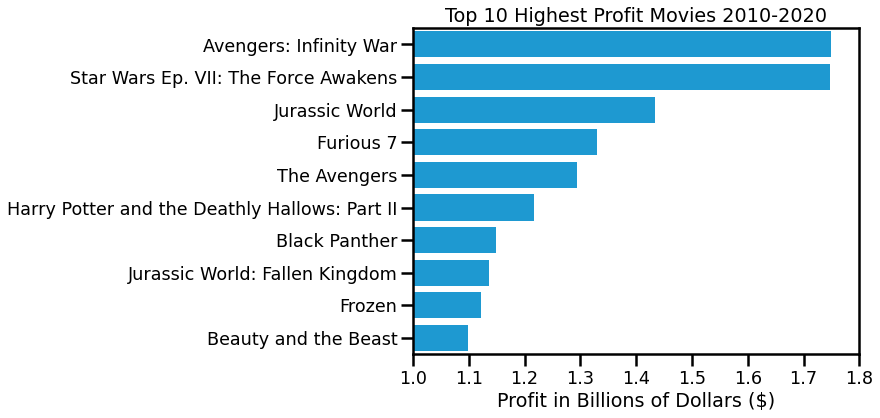

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0.75, 1.8)
barplot = sns.barplot(x = height_top10_profit, y = top10_profit, color='#00A4EF')
barplot.set(title = 'Top 10 Highest Profit Movies 2010-2020', xlabel = 'Profit in Billions of Dollars ($)')
ax.set_xlim(1, 1.8)
# sns.set_style('ticks')
#plt.savefig('profit1.png', bbox_inches='tight');

In [50]:
df_budget['production_budget'] = df_budget['production_budget'].apply(lambda x: x * 1000)

In [51]:
df_budget['profit'] = df_budget['profit'].apply(lambda x: x / 1000000000)

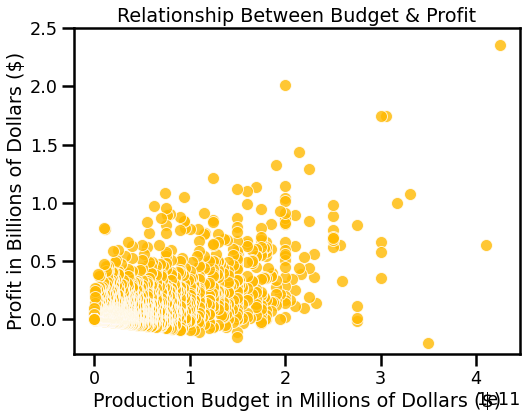

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))
x_axis_corr = df_budget['production_budget']
y_axis_corr = df_budget['profit']

hat_plot = sns.scatterplot(data=df_budget, x=x_axis_corr, y=y_axis_corr, color='#FFB900', alpha=0.8)

plt.plot([0, 400], [0, 0], color='#F25022')
plt.plot([0, 400], [.5, .5], color='#7FBA00')


ax.set_ylim(-.3, 2.5)
ax.set_title('Relationship Between Budget & Profit')
ax.set_xlabel('Production Budget in Millions of Dollars ($)')
ax.set_ylabel('Profit in Billions of Dollars ($)')
sns.set_context('poster')
# plt.savefig('budget_profit.png', bbox_inches='tight');

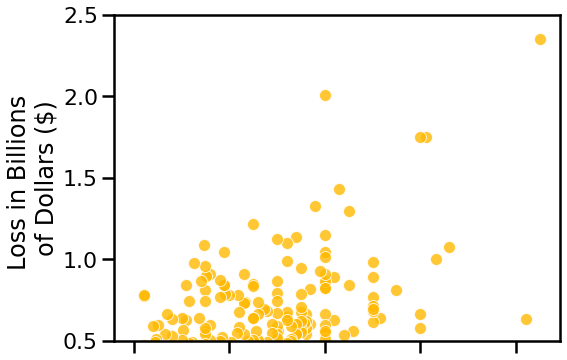

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))


hat_plot = sns.scatterplot(data=df_budget, x=x_axis_corr, y=y_axis_corr, color='#FFB900', alpha=0.8)

ax.set_ylim(0.5, 2.5)
ax.set_ylabel('Loss in Billions \nof Dollars ($)')
ax.set_xlabel('Profit Budget in Millions of Dollars ($)')
ax.set(xticklabels = [])
ax.set(xlabel = None)
sns.set_context('poster');

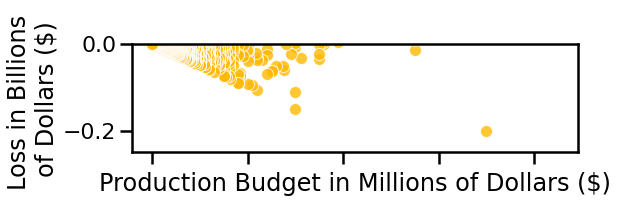

In [54]:
fig, ax = plt.subplots(figsize=(8, 2))


hat_plot = sns.scatterplot(data=df_budget, x=x_axis_corr, y=y_axis_corr, color='#FFB900', alpha=0.8)

ax.set_ylim(-.25, 0)
ax.set_ylabel('Loss in Billions \nof Dollars ($)')
ax.set_xlabel('Production Budget in Millions of Dollars ($)')
ax.set(xticklabels = []);

### Marcelo runtime/profit using Hatice and Anthony databases

In [55]:
# sorting Anthony's database and creating database
leftjoin_rating_basics = awdf_tratings.set_index('tconst').join(awdf_tbasics.set_index('tconst'), how='left', lsuffix='1', rsuffix='2')
sorted_numvotes = leftjoin_rating_basics.sort_values(by='numvotes', ascending=False)
sorted_averatings = leftjoin_rating_basics.sort_values(by='averagerating', 
                                                       ascending=False).loc[leftjoin_rating_basics['numvotes'] >= 50000]

In [56]:
# get rid of uninmportant information for this visualisation
sorted_averatings_m = sorted_averatings.copy()
sorted_averatings_m.reset_index(inplace=True)
sorted_averatings_m.drop(['tconst', 'averagerating', 'numvotes', 'start_year', 'original_title', 'genres'], axis=1, inplace=True)
sorted_averatings_m.rename(columns={'primary_title': 'title'}, inplace=True)
sorted_averatings_m.set_index('title', inplace=True)

In [57]:
# create 'profit' column and get rid of uninmportant information for this visualisation
df_budget_m = df_budget.copy()
df_budget_m.drop(['id', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'], axis=1, inplace=True)
df_budget_m.rename(columns={'movie': 'title'}, inplace=True)
df_budget_m.set_index('title', inplace=True)

In [58]:
# join the profit with runtime dataframes. Drops NaN and duplicates
prof_run_df = df_budget_m.join(sorted_averatings_m)
prof_run_df.reset_index(inplace=True)
prof_run_df.dropna(inplace=True)
prof_run_df.drop_duplicates(subset=['title'], inplace=True)

In [59]:
# finds the runtime of the top200 performing movies
top200_runtime_arr = prof_run_df.sort_values(by='profit', ascending=False).sort_values(by='profit', ascending=False)[:200]['runtime_minutes'].values
print(np.percentile(top200_runtime_arr, 75))
print(np.percentile(top200_runtime_arr, 25))

133.0
104.0


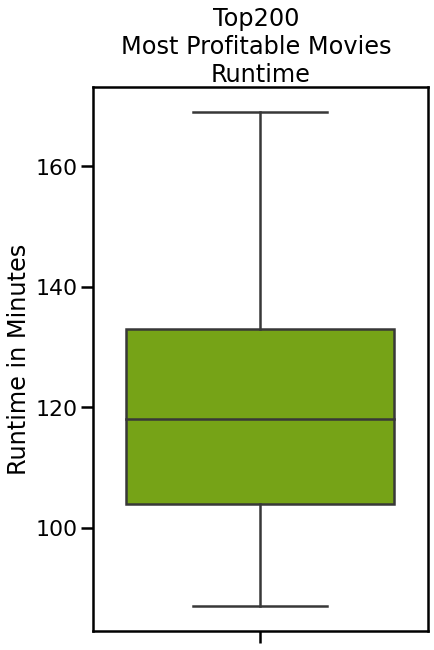

In [60]:
top200_prof_df = prof_run_df.sort_values(by='profit', ascending=False).sort_values(by='profit', ascending=False)[:200]
fig, ax = plt.subplots(figsize=(6, 10))

ax = sns.boxplot(y="runtime_minutes", data=top200_prof_df, linewidth=2.5, color="#7FBA00", showfliers=False)
ax.set_ylabel('Runtime in Minutes')
ax.set_title('Top200 \nMost Profitable Movies \nRuntime');

## Conclusions

Given all the information we gathered and visualized, the recommendations we have are:

- **Makes movies based on existing popular franchises.** The data suggest that big movie franchises are taking over the box office. The conclusion is to get into that area by acquiring the IP of a famous and well rated book series that would adapt well to the movie media.
- **Keep the runtime between 105 and 135 minutes.** The top200 most profitable movies in the last twnty years have an interquartile range between 105 and 135 minutes.
- **Focus on Action/Adventure, Drama, and Family genres.** These genres are the most popular acording to data votes.

### Next Steps

Further research should yeld important information on:

- **Research existing popular franchises.** Be either Video games, Books or Comics that could catapult a new franchise in the cinemas.
- **Get more accurate data on film crew.** This would correlate to who Microsoft could hire to increase their chances of making a higher profit movie.
- **Get more accurate data on movie ratings.** Get more concrete data in the most profitable movie ratings.